In [ ]:
import tensorflow as tf
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print( train_images.shape )
print( train_labels.shape )

from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

"""
input_tensor = layers.Input(shape=(784,))
x = layers.Dense(32, activation='relu')(input_tensor)
output_tensor = layers.Dense(10, activation='softmax')(x)
model = models.Model(inputs=input_tensor, outputs=output_tensor)
"""

network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

network.fit(train_images, train_labels, epochs=5, batch_size=128)

test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

(60000, 28, 28)
(60000,)
Epoch 1/5
469/469 [==============================] - 5s 9ms/step - loss: 0.4149 - accuracy: 0.8789
Epoch 2/5
469/469 [==============================] - 4s 9ms/step - loss: 0.1120 - accuracy: 0.9670
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0683 - accuracy: 0.9801
Epoch 4/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0465 - accuracy: 0.9859
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0687 - accuracy: 0.9783
test_acc: 0.9782999753952026


In [ ]:
# numpy
import numpy as np

# Scalars (0D tensors)
x = np.array(12)
print(x)
print(x.ndim)
print()

# Vectors (1D tensors)
x = np.array([12, 3, 6, 14])
print(x)
print(x.ndim)
print()

# Matrices (2D tensors)
x = np.array([[5, 78, 2, 34, 0],
[6, 79, 3, 35, 1],
[7, 80, 4, 36, 2]])
print(x)
print(x.ndim)
print()

# 3D tensors and higher-dimensional tensors
x = np.array([[[5, 78, 2, 34, 0],
[6, 79, 3, 35, 1],
[7, 80, 4, 36, 2]],
[[5, 78, 2, 34, 0],
[6, 79, 3, 35, 1],
[7, 80, 4, 36, 2]],
[[5, 78, 2, 34, 0],
[6, 79, 3, 35, 1],
[7, 80, 4, 36, 2]]])
print(x)
print(x.ndim)
print()

# Key attributes: Number of axes (rank), Shape, Data type 


In [ ]:
## 
# Real-world examples of data tensors
# 1) Vector data—2D tensors of shape (samples, features)
# 2) Timeseries data or sequence data—3D tensors of shape (samples, timesteps, features)
# 3) Images—4D tensors of shape (samples, height, width, channels) or (samples, channels, height, width)
# 4) Video—5D tensors of shape (samples, frames, height, width, channels) or (samples, frames, channels, height, width)

# The gears of neural networks: tensor operations
# 1) Element-wise operations
# 2) Broadcasting
# 3) Tensor dot

# Tensor reshaping

# Different layers are appropriate for different tensor formats and different types of data processing. 
# 1) 2D tensors of shape (samples, features) -> ense layers
# 2) 3D tensors of shape (samples, timesteps, features) -> LSTM layer
# 3) 4D tensors, processed by 2D convolution layers (Conv2D)


In [ ]:
digit = train_images[4]
digit = digit.reshape(28, 28)
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [ ]:
my_slice = train_images[10:100]
my_slice = my_slice.reshape(-1, 28, 28)
print(my_slice.shape)
print()

(90, 28, 28)



In [ ]:
# IMDB

from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
# num_words=10000, only keep the top 10,000 most frequently 
# occurring words in the training data. Rare words will be discarded

In [ ]:

print( len(train_data[0]) )
print( train_labels[0] )
print()

print( min(train_data[0]) )
print( max(train_data[0]) )
print()

word_index = imdb.get_word_index()
print( type(word_index) )
print()

reverse_word_index = {}
for k, v in word_index.items():
  #print(k, v)
  reverse_word_index[v] = k
#reverse_word_index = dict( [(value, key) for (key, value) in word_index.items()] )
#print(reverse_word_index)

def decode_view(mr_data, reverse_word_index):
  content = ""
  for i in mr_data:
    content = content + " " + reverse_word_index.get(i - 3, '?')
    # offset by 3 because 0 -> “padding,”, 1, -> “start of sequence,”, 2 -> “unknown.”
  return content

#decode_view( train_data[0], reverse_word_index )
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


In [ ]:
print( x_train[0] )
print( type(train_labels) )
print( train_labels.shape )
print()
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')
print( type(y_train) )
print( y_train.shape )
print( type(y_train) )
print( y_train.shape )
print()
print( train_labels[:10] )
print( y_train[:10] )

In [ ]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

#model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))
# model.fit() returns a History object
# has a member history (a dictionary) storing data about everything that happened during training

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])



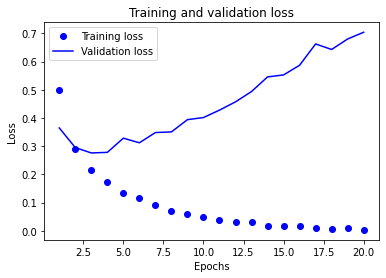

In [ ]:

history_dict = history.history
print( history_dict.keys() )
print()

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, 20 + 1)

import matplotlib.pyplot as plt

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

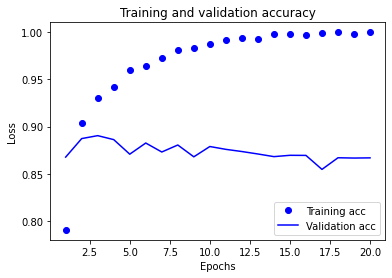

In [ ]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# overfitting:
# overoptimizing on the training data

# reduce epoch, 

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

print( results )
print()
print( model.predict(x_test) )

In [ ]:
# Classifying newswires: a multiclass classification example

from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [ ]:
print( len(train_data) )
print( len(test_data) )
print()
#print( len(train_data[10]) )
#print( train_labels[10] )
print()
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

decode_view( train_data[0], reverse_word_index )
#decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
#print( decoded_newswire )
print()

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

"""
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1.
  return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

"""

from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)
# one-hot encoding

from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

history = model.fit(partial_x_train,
  partial_y_train,
  epochs=20,
  batch_size=512,
  validation_data=(x_val, y_val))

8982
2246



Epoch 1/20
16/16 [==============================] - 1s 58ms/step - loss: 3.1741 - accuracy: 0.3955 - val_loss: 1.7920 - val_accuracy: 0.6280
Epoch 2/20
16/16 [==============================] - 1s 45ms/step - loss: 1.5753 - accuracy: 0.6753 - val_loss: 1.3283 - val_accuracy: 0.7100
Epoch 3/20
16/16 [==============================] - 1s 47ms/step - loss: 1.1273 - accuracy: 0.7595 - val_loss: 1.1394 - val_accuracy: 0.7550
Epoch 4/20
16/16 [==============================] - 1s 47ms/step - loss: 0.8584 - accuracy: 0.8256 - val_loss: 1.0398 - val_accuracy: 0.7890
Epoch 5/20
16/16 [==============================] - 1s 47ms/step - loss: 0.6930 - accuracy: 0.8611 - val_loss: 0.9770 - val_accuracy: 0.7970
Epoch 6/20
16/16 [==============================] - 1s 45ms/step - loss: 0.5497 - accuracy: 0.8930 - val_loss: 0.9417 - val_accuracy: 0.8010
Epoch 7/20
16/16 [==============================] - 1s 47ms/step - loss: 0.4516 - accuracy: 0.9122 - val_loss: 0.9070 - val_accuracy: 0.8050


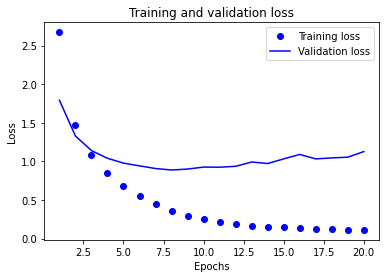

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


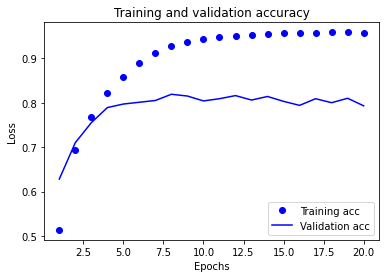

In [ ]:
print(history.history.keys())

plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# 
#

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(partial_x_train,
  partial_y_train,
  epochs=9,
  batch_size=512,
  validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

print()
print( results )

Epoch 1/9
16/16 [==============================] - 1s 58ms/step - loss: 3.2158 - accuracy: 0.3724 - val_loss: 1.8158 - val_accuracy: 0.6520
Epoch 2/9
16/16 [==============================] - 1s 46ms/step - loss: 1.5806 - accuracy: 0.6933 - val_loss: 1.3494 - val_accuracy: 0.7060
Epoch 3/9
16/16 [==============================] - 1s 47ms/step - loss: 1.1377 - accuracy: 0.7558 - val_loss: 1.1541 - val_accuracy: 0.7520
Epoch 4/9
16/16 [==============================] - 1s 46ms/step - loss: 0.9023 - accuracy: 0.8064 - val_loss: 1.0565 - val_accuracy: 0.7740
Epoch 5/9
16/16 [==============================] - 1s 46ms/step - loss: 0.6824 - accuracy: 0.8499 - val_loss: 0.9804 - val_accuracy: 0.8090
Epoch 6/9
16/16 [==============================] - 1s 45ms/step - loss: 0.5657 - accuracy: 0.8851 - val_loss: 0.9271 - val_accuracy: 0.8110
Epoch 7/9
16/16 [==============================] - 1s 47ms/step - loss: 0.4427 - accuracy: 0.9134 - val_loss: 0.8992 - val_accuracy: 0.8140
Epoch 8/9
16/16 [===

In [ ]:
import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
print( float(np.sum(hits_array)) / len(test_labels) )

0.195013357079252


In [ ]:
predictions = model.predict(x_test)
print( predictions[0].shape )
print( np.sum(predictions[0]) )
print( np.argmax(predictions[0]) )
print()
print( predictions[0] )
print()

print( train_labels )
print( np.array(train_labels) )

In [ ]:
# Predicting house prices: a regression example
# The Boston Housing Price dataset

from keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57344/57026 [==============================] - 0s 0us/step


In [ ]:
print( train_data.shape )
print( test_data.shape )
print()

#print( len(train_targets) )
#print( train_targets )

# feature-wise normalization
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std


(404, 13)
(102, 13)



In [ ]:
from keras import models
from keras import layers

print( train_data.shape )
print( train_data.shape[1] )
print()

def build_model():
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(1))
  # ends with a single unit and no activation -> a linear layer
  # typical setup for scalar regression
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

# so few data points -> validation set being very small
# a high variance with regard to the validation split


# K-fold cross-validation 
# splitting the available data into K partitions, (typically K = 4 or 5)
# instantiating K identical models
# training each one on K – 1 partitions while evaluating on the remaining partition
# validation score -> average of the K validation scores obtained

import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 500
all_scores = []
all_mae_histories = []

for i in range(k):
  print('processing fold #', i)
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate(
    [train_data[:i * num_val_samples],
    train_data[(i + 1) * num_val_samples:]],
    axis=0)
  partial_train_targets = np.concatenate(
    [train_targets[:i * num_val_samples],
    train_targets[(i + 1) * num_val_samples:]],
    axis=0)
  model = build_model()
  history = model.fit(partial_train_data, partial_train_targets, validation_data=(val_data, val_targets), epochs=num_epochs, batch_size=1, verbose=0)
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
  # (in silent mode, verbose = 0)
  all_scores.append(val_mae)
  #print( history.history.keys() )
  mae_history = history.history['val_mae']
  all_mae_histories.append(mae_history)

(404, 13)
13

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [ ]:
print( all_scores )
print()
print( np.mean(all_scores) )

[2.5420384407043457, 2.84409236907959, 2.7896618843078613, 2.6000723838806152]

2.693966269493103


4
<class 'list'>

2.554439004898071
2.7293546872138976
2.7979298324584962
2.713811393737793


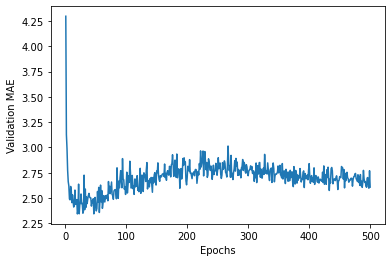

In [ ]:
print( len(all_mae_histories) )
print( type(all_mae_histories) )
print()
for x in all_mae_histories:
  print( np.mean(x) )

average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

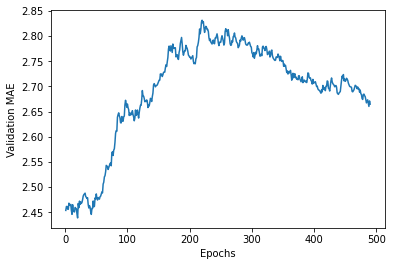

In [ ]:

def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if len(smoothed_points) > 0:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points


smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()


In [ ]:
model = build_model()
model.fit(train_data, train_targets, epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

print( test_mae_score )

4/4 [==============================] - 0s 3ms/step - loss: 17.4528 - mae: 2.5738
2.573801040649414


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3